# 1. Basics of PyTorch

This notebook is about basic knowledge for implementing DL using PyTorch. (tensor, autograd, gradient descent.)

**Table of Contents**

* [**Brief History of PyTorch**](#Brief-History-of-PyTorch)

* **1.1.** [**Tensor**](#1.1.-Tensor)

    - **a.** [**Construct-a-Tensor**](#a.-Construct-a-Tensor)
    
    - **b.** [**Size & Shape of a Tensor**](#b.-Size-&-Shape-of-a-Tensor)
    
    - **c.** [**The Arithmetic Operation of Tensors**](#c.-The-Arithmetic-Operation-of-Tensors)
    
* **1.2.** [**Autograd**](#1.2.-Autograd)
    - **Example:** [**Image recovering**](#Example:-Image-recovering)

## Brief History of PyTorch

딥러닝 알고리즘들은 행렬연산을 반복하게 되는데, 기존 어느 영역의 알고리즘에서도 쉽게 볼 수 없던 많은 계산량이다. 

이를 해결하기 위해, 딥러닝의 초기 발전을 이끌었던 MILA 연구실에서 GPU를 사용해 행렬연산을 가속하는 Theano라는 프레임워크를 개발

이후 Keras 같은 오픈소스 라이브러리들이 Theano를 기반으로 탄생하는 등 Theano는 딥러닝 발전에 크게 기여하였다.

그러나 직관적이지 않은 사용법과 잦은 버그, 대형 모델에 적용하기 어려운 점 등으로 2017년에 개발이 중단되었다. 

하지만 Theano를 통한 노하우는 여러 프레임워크 개발에 지대한 영향을 끼쳤고, TensorFlow를 비롯한 Caffe, MXNet, CNTK 등이 개발되었고, PyTorch는 TensorFlow 이후 개발된 비교적 새로운 프레임워크이다. 

![image](https://user-images.githubusercontent.com/88715406/178248675-b582bdf2-3eb2-4e90-bb34-2083ff9788f7.png)

PyTorch는 Facebook 주도로 여러 회사와 대학이 협력해 개발한 오픈소스 소프트웨어이다. 

TensorFlow를 비롯한 대부분의 딥러닝 프레임워크는 static computational graph (정적 계산 그래프; 계산 그래프를 실행 중에는 바꿀 수 없음) 방식을 사용한다. 그래프가 실행 전에 결정되므로, 최적화가 쉽다는 장점이 있다. 

반면 PyTorch는 실행 중에도 그래프를 변경할 수 있는 dynamic computational graph (동적 계산 그래프) 방식을 사용해, 데이터에 유연한 모델을 제작할 수 있다는 장점이 있다. 

## 1.1. Tensor
0D : scalar 

1D : vector

2D : Matrix

(n>=3)D : Tensor

![image](https://user-images.githubusercontent.com/88715406/178185697-cefdad54-f99c-4217-b6b8-ab146b502eb7.png)

In [1]:
import torch 

### a. Construct a Tensor

In [2]:
# Construct 2 x 1 x 3 tensor
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### b. Size & Shape of a Tensor

In [3]:
# Size & Shape of x
print("Size:", x.size())
print("Shape:", x.shape)
print("Rank, Dimension:", x.ndimension())

Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
Rank, Dimension: 2


We can change rank & shape using squeeze, unsqueeze, view functions. 

In [4]:
# Increasing rank 
y = torch.unsqueeze(x, 0) # Insert 1 dimension at 0 axis of x
print(y)
print("Size:", y.size())
print("Shape:", y.shape)
print("Rank, Dimension:", y.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
Rank, Dimension: 3


In [5]:
# Decreasing rank 
z = torch.squeeze(y) # Delete axis which has dimension 1 
print(z)
print("Size:", z.size())
print("Shape:", z.shape)
print("Rank, Dimension:", z.ndimension())


w = torch.tensor([[[1, 2, 3]], [[4, 5, 6]], [[7, 8, 9]]]) # 3 x 1 x 3 tensor
w = torch.squeeze(w)
print(w)
print("Size:", w.size())
print("Shape:", w.shape)
print("Rank, Dimension:", w.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
Rank, Dimension: 2
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
Rank, Dimension: 2


In [6]:
# You can change the shape yourself with view()
x = x.view(9) # rank 2, 3 x 3 --> rank 1 , 9
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("Rank, Dimension:", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
Rank, Dimension: 1


In [7]:
# But if the number of elements is different, error.
try: 
    x = x.view(2, 4)
except Exception as e:
    print(e)

shape '[2, 4]' is invalid for input of size 9


### c. The Arithmetic Operation of Tensors
For the matrix multiplication, we can use torch.mm().

In [8]:
# The product of two matrices W & X
W = torch.randn(5,3, dtype=torch.float)
X = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

print("W size:", W.size()) # 5 x 3
print("X size:", X.size()) # 3 x 2
print("W:", W)
print("X:", X)

WX = torch.mm(W, X)
print("WX size:", WX.size()) # 5 x 2
print("WX:", WX)

# The sum of two matrices WX & b
b = torch.randn(5, 2, dtype=torch.float)
print("b size:", b.size())
print("b:", b)

print("Result:", WX + b)

W size: torch.Size([5, 3])
X size: torch.Size([3, 2])
W: tensor([[-0.3152, -0.2614,  1.3705],
        [-1.4423, -1.3449,  0.0245],
        [-1.8859, -0.8071, -0.2066],
        [-0.6255,  0.1402, -0.2205],
        [-1.1953,  0.3179,  1.6070]])
X: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
WX size: torch.Size([5, 2])
WX: tensor([[ 5.7530,  6.5469],
        [-5.3545, -8.1172],
        [-5.3404, -8.2400],
        [-1.3072, -2.0129],
        [ 7.7937,  8.5234]])
b size: torch.Size([5, 2])
b: tensor([[ 0.3741,  0.3350],
        [-0.2637,  1.0280],
        [-0.1956,  0.3031],
        [ 0.9096,  0.5605],
        [-0.6140, -1.9505]])
Result: tensor([[ 6.1270,  6.8819],
        [-5.6182, -7.0892],
        [-5.5360, -7.9370],
        [-0.3976, -1.4524],
        [ 7.1798,  6.5729]])


## 1.2. Autograd
PyTorch의 Autograd는 미분 계산을 자동화하여 Gradient Descent를 구현한 자동 미분 엔진이다.

In [9]:
w = torch.tensor(1.0, requires_grad=True) # True로 설정하면, PyTorch의 Autograd가 자동으로 w에 대한 미분 값을 w.grad에 저장해준다. 
a = w * 3
l = a ** 2

$l = a^2 = (3w)^2 = 9w^2$

In [10]:
l.backward() 
print('dl/dw = {}'.format(w.grad))

dl/dw = 18.0


### Example: Image recovering

아주 간단한 모델을 만들어, 오염된 이미지를 복원하는 문제를 풀어보자.
original_image(not given)가 weird_function()을 거쳤더니 broken_image로 오염되었다고 하자. 

weird_function()을 분석해 이의 역함수를 만들 수 있겠지만, 까다로운 작업이다. 

머신러닝과 수학적 최적화의 관점에서 다음과 같이 문제를 풀이할 수 있을 것이다.

Finding random_image s.t. **weird_function(random_image) = broken_image**

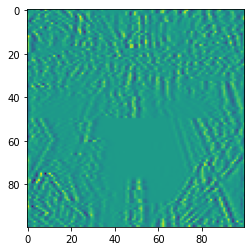

In [11]:
import torch
import numpy
import pickle # Python 객체를 파일 형태로 저장할 때 주로 사용
import matplotlib.pyplot as plt # 이미지를 출력하는데 사용

shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )
plt.imshow(broken_image.view(100, 100)) 

In [12]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [13]:
# 가설 tensor와 실제 broken_image 사이의 오차
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image) # p-norm (default p = 2)

In [14]:
# random_tensor 정의. Gradient descent를 통해 original_tensor로 변환해보자.
random_tensor = torch.randn(10000, dtype=torch.float) 

# learning_rate
lr = 0.8

* **Gradient Descent**

random_tensor의 requires_grad를 활성화하여 backward()를 통해 gradient를 구할 수 있다. 

loss.backward()는 loss에 사용된 parameter들 중 requires_grad = True인 변수들에 대해 gradient를 구해 각 변수의 .grad에 저장해준다. 
(Back Propagation에서 첫 시작점은 loss이므로, loss에 backward() 함수를 적용해주어야 한다.)

Loss at 0 = 12.446239471435547
Loss at 1000 = 1.1391443014144897
Loss at 2000 = 0.5437681674957275
Loss at 3000 = 0.3747510612010956
Loss at 4000 = 0.2955763638019562
Loss at 5000 = 0.24763746559619904
Loss at 6000 = 0.21328367292881012
Loss at 7000 = 0.18593519926071167
Loss at 8000 = 0.1626845896244049
Loss at 9000 = 0.14204910397529602
Loss at 10000 = 0.12318331748247147
Loss at 11000 = 0.1055690199136734
Loss at 12000 = 0.08887374401092529
Loss at 13000 = 0.07287659496068954
Loss at 14000 = 0.057426415383815765
Loss at 15000 = 0.042417239397764206
Loss at 16000 = 0.027774691581726074
Loss at 17000 = 0.02115911804139614
Loss at 18000 = 0.021166684105992317
Loss at 19000 = 0.021167846396565437


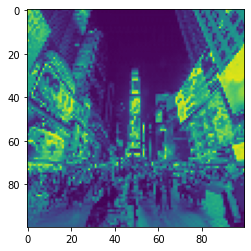

In [15]:
for i in range(0, 20000):
    random_tensor.requires_grad_(True)
    
    hypothesis = weird_function(random_tensor)
    
    loss = distance_loss(hypothesis, broken_image)
    
    loss.backward() # loss를 random_tensor로 미분 
    
    with torch.no_grad(): # 직접 gd를 구현할 것이므로, 자동 기울기 하강을 비활성화
        random_tensor = random_tensor - lr * random_tensor.grad # gradient descent
    
    # 1000번째마다 오차 출력
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))
    
plt.imshow(random_tensor.view(100, 100).data)

* **.grad**

위에서 .backward()를 통해 gradient가 .grad에 저장됨을 알 수 있었다. 

주의해야할 점은, gradient가 축적된다는 것이다. 

In [16]:
## simple NN ##

w = torch.randn(1, dtype=torch.float, requires_grad=True)
x_train = torch.randn(1, dtype=torch.float)
y_train = torch.randn(1, dtype=torch.float)

for i in range(3):
    y_hat = w * x_train

    error = y_train - y_hat
    loss = (error**2).mean()
    
    loss.backward()
    
    print(w.grad) 

tensor([5.1860])
tensor([10.3719])
tensor([15.5579])


즉 원래 값에 새로운 값이 계속 더해진다. 

PyTorch가 이를 default로 설정해놓은 이유는 circumvent harware limitation 이 있을 때 유용하기 때문.

엄청나게 커다란 모델을 돌릴때, mini-batch안에 필요한 데이터 포인트의 수가 너무너무 커서 우리가 가진 하드웨어 자원을 초과할 수 있다. 

좋은 그래픽 카드를 살 돈이 없다면 어떻게 해야할까? Mini-batch임에도 우리의 컴퓨터에게는 너무 커다란 뭉탱이니까, 이를 sub-mini-batch로 다시 쪼개는 것이다. 

이 sub-mini-batch를 계산해서, 축적한다면, full mini-batch의 gradient를 계산할 수 있게 되는 것이다.

* **zero_**

이러한 축적을 피하기 위해, 가중치들을 업데이트할 때마다 **zero_()** method를 통해 grad를 0으로 만들어주어야 한다.

zero 뒤_의 의미는, in-place, 즉 어떤 method를 적용한 결과값으로 곧바로 해당 변수를 바꾼다는 뜻이다. 

In [17]:
## simple NN ##
for i in range(3):
    y_hat = w * x_train

    error = y_train - y_hat
    loss = (error**2).mean()
    
    loss.backward()
    
    print(w.grad)
    w.grad.zero_()

tensor([20.7438])
tensor([5.1860])
tensor([5.1860])


In [18]:
# Example 1

x = torch.ones(1, requires_grad=True)
print(x)
y = x + 2
print(y)
print("===== Run backward =====")
y.backward()
print(y)
print(x.grad)
# Output
"""
tensor([1.], requires_grad=True)
tensor([3.], grad_fn=<AddBackward0>)
===== Run backward =====
tensor([3.], grad_fn=<AddBackward0>)
tensor([1.])
"""

tensor([1.], requires_grad=True)
tensor([3.], grad_fn=<AddBackward0>)
===== Run backward =====
tensor([3.], grad_fn=<AddBackward0>)
tensor([1.])


'\ntensor([1.], requires_grad=True)\ntensor([3.], grad_fn=<AddBackward0>)\n===== Run backward =====\ntensor([3.], grad_fn=<AddBackward0>)\ntensor([1.])\n'

In [19]:
# Example 2

x = torch.ones(2, 2, requires_grad=True)
print(x)
"""
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
"""
y = x + 2
print(y)
"""
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
"""
z = y * y * 3
out = z.mean()
print(z, out)
"""
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)
"""
out.backward()
print(x.grad)
"""
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
"""

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


'\ntensor([[4.5000, 4.5000],\n        [4.5000, 4.5000]])\n'

In [20]:
# Example 3 (https://velog.io/@bismute/Pytorch%EC%9D%98-Autograd%EB%A5%BC-%EC%A0%9C%EB%8C%80%EB%A1%9C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0)
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
print(y)  # tensor([-195.7258,  698.0129, -715.0337], grad_fn=<MulBackward0>)

gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)
print(x.grad)  # tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])

tensor([-690.3812, -917.4011,  -23.9657], grad_fn=<MulBackward0>)
tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])
